In [1]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model    #학습된 모델 로드
import matplotlib.pyplot as plt

In [5]:

model = tf.keras.models.load_model('saved_model/my_model')

In [10]:
######################################################################
#이미지 전처리
#######################################################################
img_path = './dataset/forw_test/025.jpg'
# 이미지를 4D 텐서로 변경

img = image.load_img(img_path, target_size =(224, 224))
print(img )
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
print(img_tensor.shape)  # 이미지 텐서의 크기는 (1, 150, 150, 3)입니다

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x20489B65190>
(224, 224, 3)
(1, 224, 224, 3)


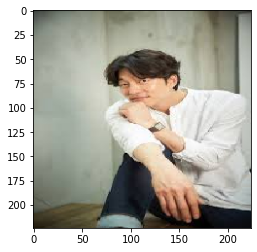

[[0.2237863]]
정자세


In [29]:
plt.imshow(img_tensor[0])
plt.show()
result = model.predict( img_tensor ) 
print(result)

if result > 0.5 :
    print("거북목")
else :
    print("정자세")

In [4]:
tm_model = tf.keras.models.load_model('./tn_model/teach_model.h5')
tm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


In [5]:
from tensorflow.keras import optimizers
tm_model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

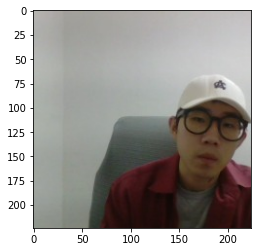

거북목 0.9826087


In [11]:
plt.imshow(img_tensor[0])
plt.show()
result = tm_model.predict( img_tensor ) 

if result[0][0] > result[0][1] :
    print("정자세", result[0][0])
else :
    print("거북목", result[0][1])